# Pharmacokinetics

In [ ]:
# download modsim.py if necessary

from os.path import exists

filename = 'modsim.py'
if not exists(filename):
    from urllib.request import urlretrieve
    # url = 'https://raw.githubusercontent.com/AllenDowney/ModSim/main/'
    url = "https://raw.githubusercontent.com/AllenDowney/ModSimPy/master/"
    local, _ = urlretrieve(url+filename, filename)
    print('Downloaded ' + local)

In [2]:
import numpy
import pandas
from matplotlib import pyplot
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import modsim

In [19]:
data = pandas.read_csv('glucose_insulin.csv', index_col='time')
data

,glucose,insulin
time,,
0,92,11
2,350,26
4,287,130
6,251,85
8,240,51
10,216,49
12,211,45
14,205,41
16,196,35


In [7]:
I = modsim.interpolate(data.insulin)

In [8]:
I(18)

array(31.66666667)

In [9]:
t_0 = data.index[0]
t_end = data.index[-1]
t_array = modsim.linrange(t_0, t_end)

In [10]:
I_array = I(t_array)

In [12]:
I_series = modsim.make_series(t_array, I_array)
I_series.head()

index
0.0     11.0
1.0     18.5
2.0     26.0
3.0     78.0
4.0    130.0
Name: values, dtype: float64

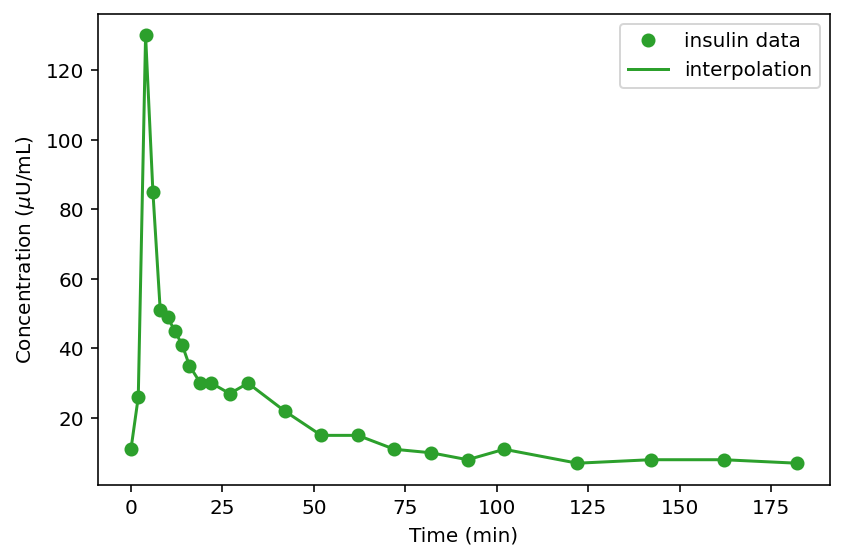

In [13]:
data.insulin.plot(style='o', color='C2', label='insulin data')
I_series.plot(color='C2', label='interpolation')

modsim.decorate(xlabel='Time (min)',
         ylabel='Concentration ($\mu$U/mL)')

### Exercise 1
`interpolate` is a wrapper for the SciPy function `interp1d`. Read the documentation of `interp1d` at http://modsimpy.com/interp.

In particular, notice the `kind` argument, which specifies a kind of interpolation. The default is linear interpolation, which connects the data points with straight lines.

Pass a keyword argument to interpolate to specify one of the other kinds of interpolation and plot the results.

In [43]:
def interpolate_and_plot(t_array, x, kind="linear"):
    _S = modsim.interpolate(x, kind=kind)
    S_array = _S(t_array)
    S_ = modsim.make_series(t_array, S_array)
    S_.plot(label=kind)

    modsim.decorate(xlabel='Time (min)',
                    ylabel='Concentration ($\mu$U/mL)')



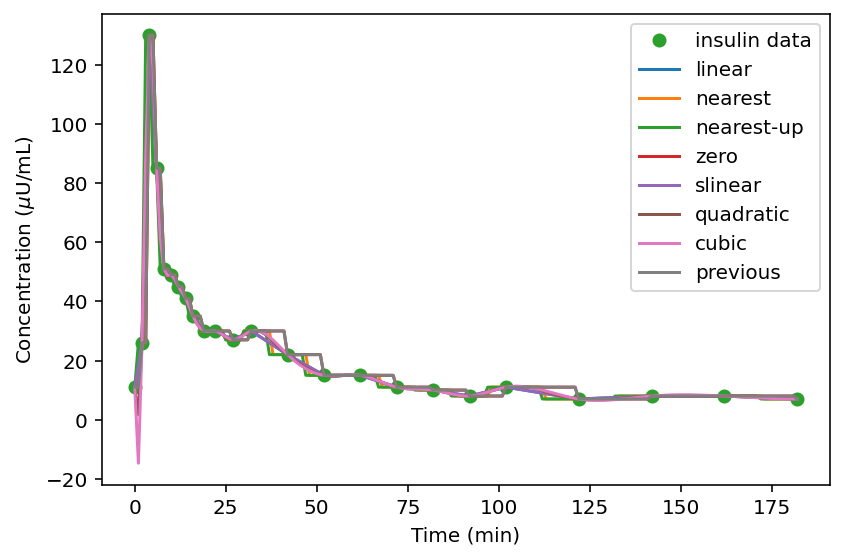

In [44]:
data.insulin.plot(style='o', color='C2', label='insulin data')
interp = [
    "linear", "nearest", "nearest-up", "zero", "slinear", "quadratic", "cubic", "previous",
]
for i in interp:
    interpolate_and_plot(t_array, data.insulin, kind=i)

### Exercise 2
Interpolate the glucose data and generate a plot, similar to the previous one, that shows the data points and the interpolated curve evaluated at the time values in `t_array`.

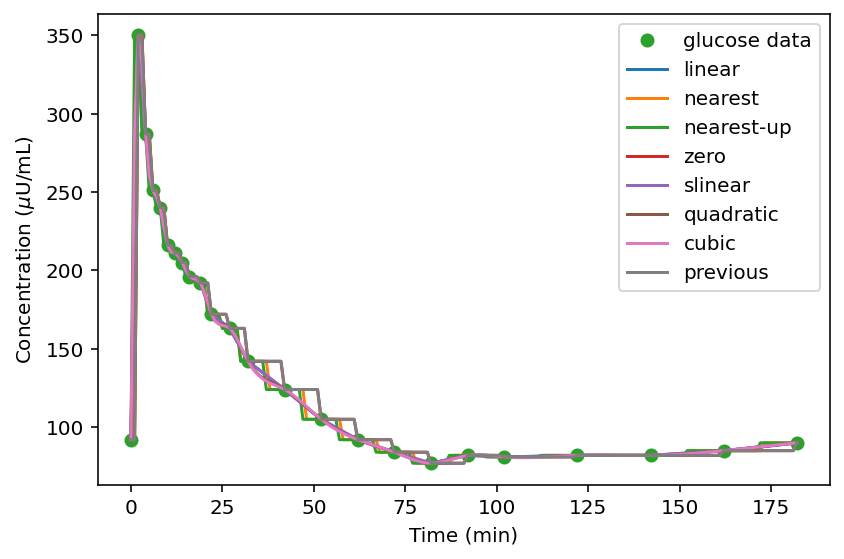

In [45]:
data.glucose.plot(style='o', color='C2', label='glucose data')
interp = [
    "linear", "nearest", "nearest-up", "zero", "slinear", "quadratic", "cubic", "previous",
]
for i in interp:
    interpolate_and_plot(t_array, data.glucose, kind=i)